# INFY: Infosys Limited 

# STEP #1: IMPORTING DATA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# STEP #2: EXPLORING THE DATASET

In [2]:
df = pd.read_csv('INFY.NS.csv', error_bad_lines=False)
df

,Date,Close
0,7/16/2010,347.125000
1,7/19/2010,346.306000
2,7/20/2010,344.955994
3,7/21/2010,346.455994
4,7/22/2010,344.312012
...,...,...
2463,7/9/2020,781.700012
2464,7/10/2020,781.849976
2465,7/13/2020,797.049988
2466,7/14/2020,783.250000


In [3]:
df.dropna(inplace = True)

In [4]:
df.isna().sum()

Date     0
Close    0
dtype: int64

In [5]:
df.index = pd.DatetimeIndex(df['Date'])
df.head()

,Date,Close
Date,,
2010-07-16,7/16/2010,347.125000
2010-07-19,7/19/2010,346.306000
2010-07-20,7/20/2010,344.955994
2010-07-21,7/21/2010,346.455994
2010-07-22,7/22/2010,344.312012


In [6]:
del df['Date']
df.head()

,Close
Date,
2010-07-16,347.125000
2010-07-19,346.306000
2010-07-20,344.955994
2010-07-21,346.455994
2010-07-22,344.312012


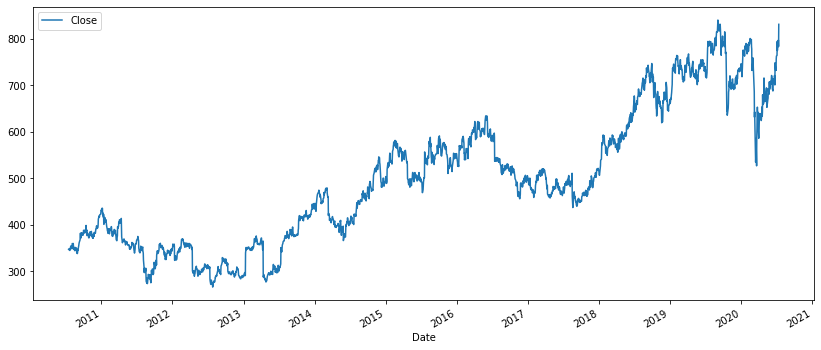

In [7]:
df.plot(figsize = (14,6))     # ORIGNAL DATA

Text(0, 0.5, 'Close')

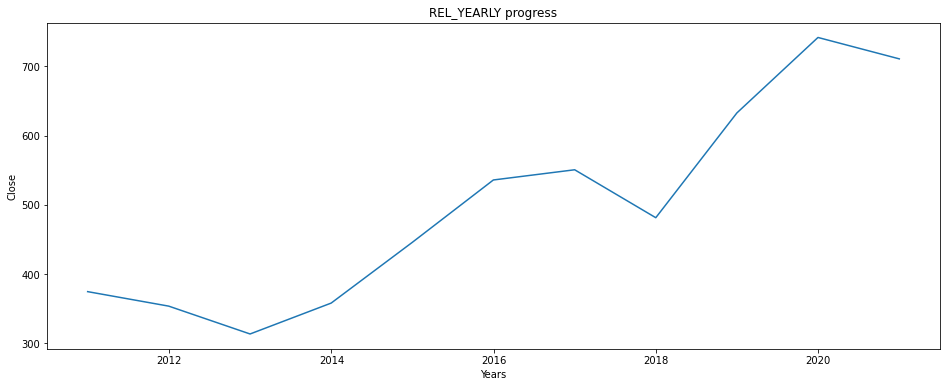

In [8]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
# Yearly
plt.figure(figsize=(16,6))
plt.plot(df.resample('Y').mean())
plt.title('REL_YEARLY progress')
plt.xlabel('Years')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

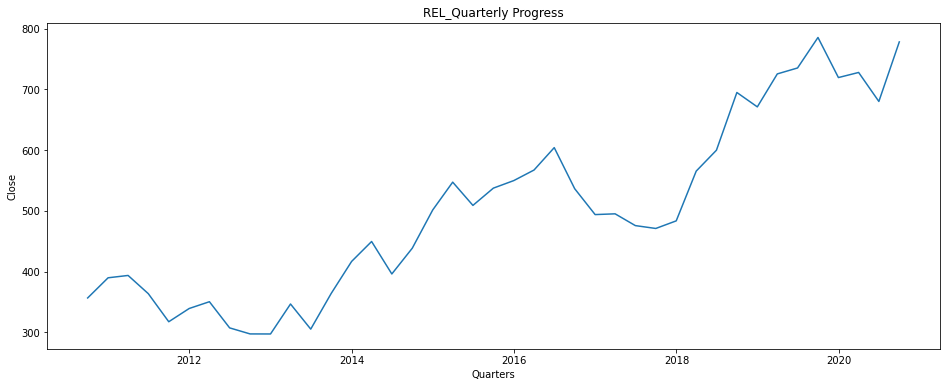

In [9]:
# Quaterly
plt.figure(figsize=(16,6))
plt.plot(df.resample('Q').mean())
plt.title('REL_Quarterly Progress')
plt.xlabel('Quarters')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

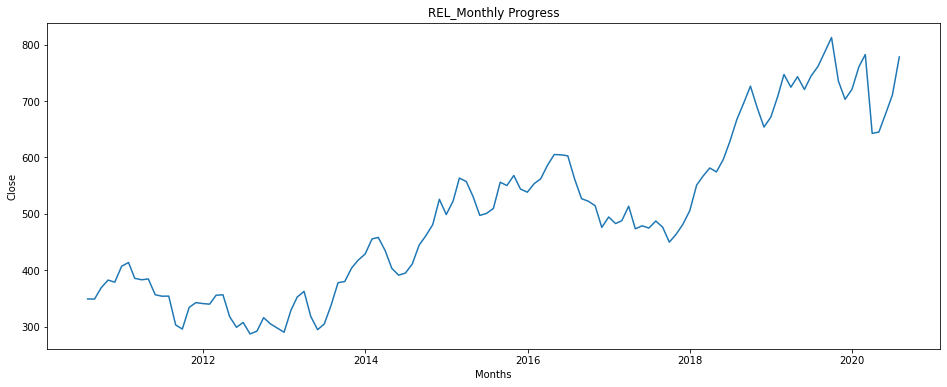

In [10]:
# Resample is a Convenience method for frequency conversion and resampling of time series.
plt.figure(figsize=(16,6))
plt.plot(df.resample('M').mean())
plt.title('REL_Monthly Progress')
plt.xlabel('Months')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

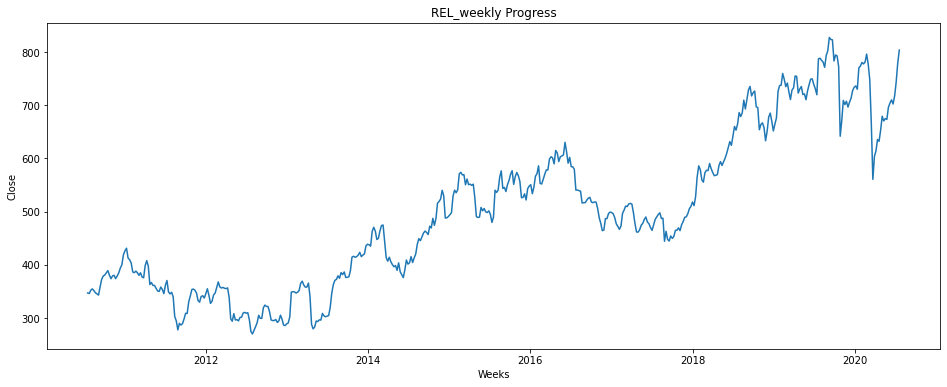

In [11]:
plt.figure(figsize=(16,6))
plt.plot(df.resample('W').mean())
plt.title('REL_weekly Progress')
plt.xlabel('Weeks')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

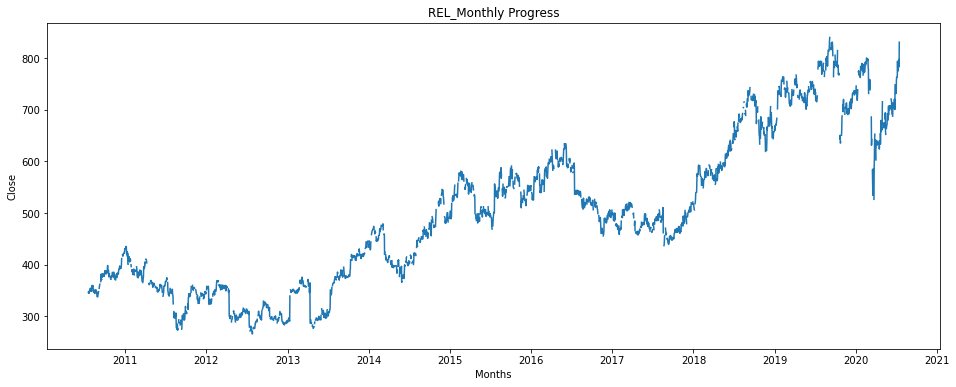

In [12]:
plt.figure(figsize=(16,6))
plt.plot(df.resample('D').mean())
plt.title('REL_Monthly Progress')
plt.xlabel('Months')
plt.ylabel('Close')

# STEP #3: PREPARING THE DATA¶

In [13]:
df

,Close
Date,
2010-07-16,347.125000
2010-07-19,346.306000
2010-07-20,344.955994
2010-07-21,346.455994
2010-07-22,344.312012
...,...
2020-07-09,781.700012
2020-07-10,781.849976
2020-07-13,797.049988


In [14]:
df_Prophet = df.resample('D').mean().reset_index()

df_Prophet.index = pd.DatetimeIndex(df_Prophet['Date'])

df_Prophet

,Date,Close
Date,,
2010-07-16,2010-07-16,347.125000
2010-07-17,2010-07-17,NaN
2010-07-18,2010-07-18,NaN
2010-07-19,2010-07-19,346.306000
2010-07-20,2010-07-20,344.955994
...,...,...
2020-07-11,2020-07-11,NaN
2020-07-12,2020-07-12,NaN
2020-07-13,2020-07-13,797.049988


In [15]:
df_Prophet.isna().sum()

Date        0
Close    1192
dtype: int64

In [16]:
df_rolling_W2 = df.rolling(window=1).mean().reset_index()
df_rolling_W2

,Date,Close
0,2010-07-16,347.125000
1,2010-07-19,346.306000
2,2010-07-20,344.955994
3,2010-07-21,346.455994
4,2010-07-22,344.312012
...,...,...
2456,2020-07-09,781.700012
2457,2020-07-10,781.849976
2458,2020-07-13,797.049988
2459,2020-07-14,783.250000


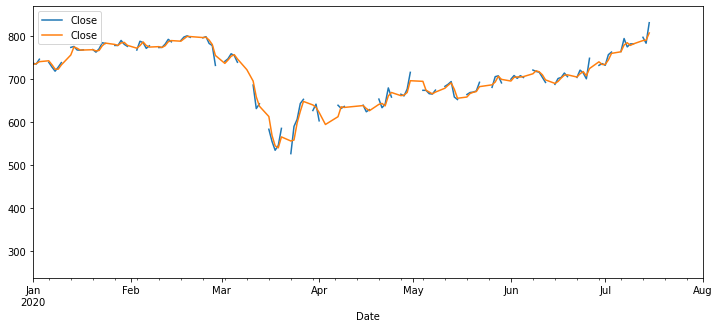

In [17]:
df_Prophet['Close'].plot(figsize=(12,5),legend = True)   # TRUE DATA
df.rolling(window=2).mean()['Close'].plot(legend = True,xlim = ['2020-01-01','2020-08-01']); # ROLLING MEAN

In [18]:
#preparing data
df = df_rolling_W2.rename(columns={'Date':'ds', 'Close':'y'})

df

,ds,y
0,2010-07-16,347.125000
1,2010-07-19,346.306000
2,2010-07-20,344.955994
3,2010-07-21,346.455994
4,2010-07-22,344.312012
...,...,...
2456,2020-07-09,781.700012
2457,2020-07-10,781.849976
2458,2020-07-13,797.049988
2459,2020-07-14,783.250000


# STEP #4: MODEL

In [19]:
m = Prophet()
m.fit(df)


future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2463,2020-07-18,741.354402,684.848738,765.064224,741.354402,741.354402,-15.616979,-15.616979,-15.616979,-12.261867,-12.261867,-12.261867,-3.355112,-3.355112,-3.355112,0.0,0.0,0.0,725.737423
2464,2020-07-19,741.438737,686.579209,766.988118,741.438737,741.438737,-14.851267,-14.851267,-14.851267,-12.261868,-12.261868,-12.261868,-2.589399,-2.589399,-2.589399,0.0,0.0,0.0,726.587470
2465,2020-07-20,741.523072,703.616922,786.038976,741.523072,741.523072,3.093722,3.093722,3.093722,4.978942,4.978942,4.978942,-1.885220,-1.885220,-1.885220,0.0,0.0,0.0,744.616793
2466,2020-07-21,741.607407,706.577600,786.357642,741.607407,741.607407,3.476148,3.476148,3.476148,4.729945,4.729945,4.729945,-1.253797,-1.253797,-1.253797,0.0,0.0,0.0,745.083555
2467,2020-07-22,741.691742,705.493814,785.420756,741.691742,741.691742,4.259455,4.259455,4.259455,4.964003,4.964003,4.964003,-0.704548,-0.704548,-0.704548,0.0,0.0,0.0,745.951197


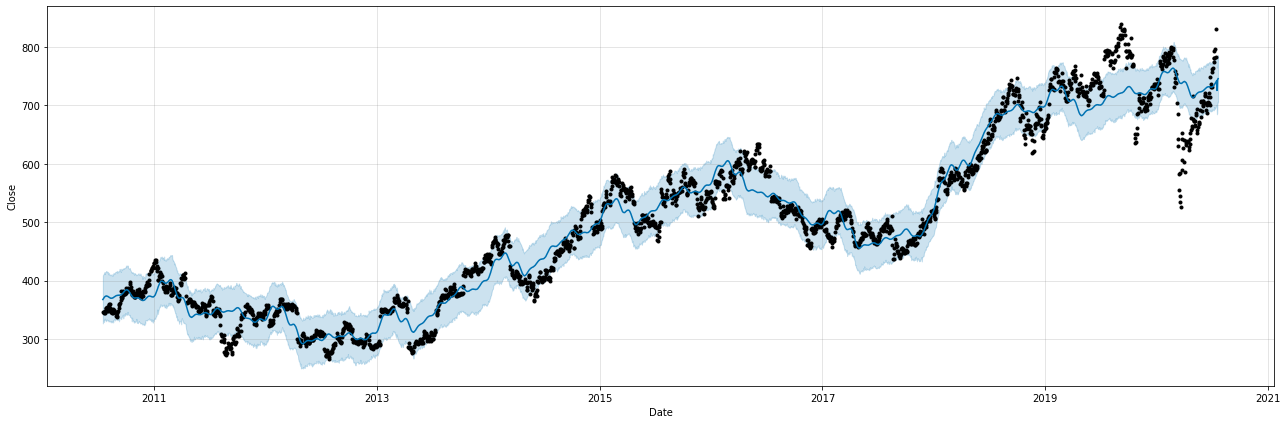

In [21]:
figure = m.plot(forecast, xlabel='Date', ylabel='Close', figsize=(18,6))

# BLACK DOT REPRESENTS THE ORIGNAL DATA
# BLACK DOT REPRESENTS THE PREDICTED DATA / TREND

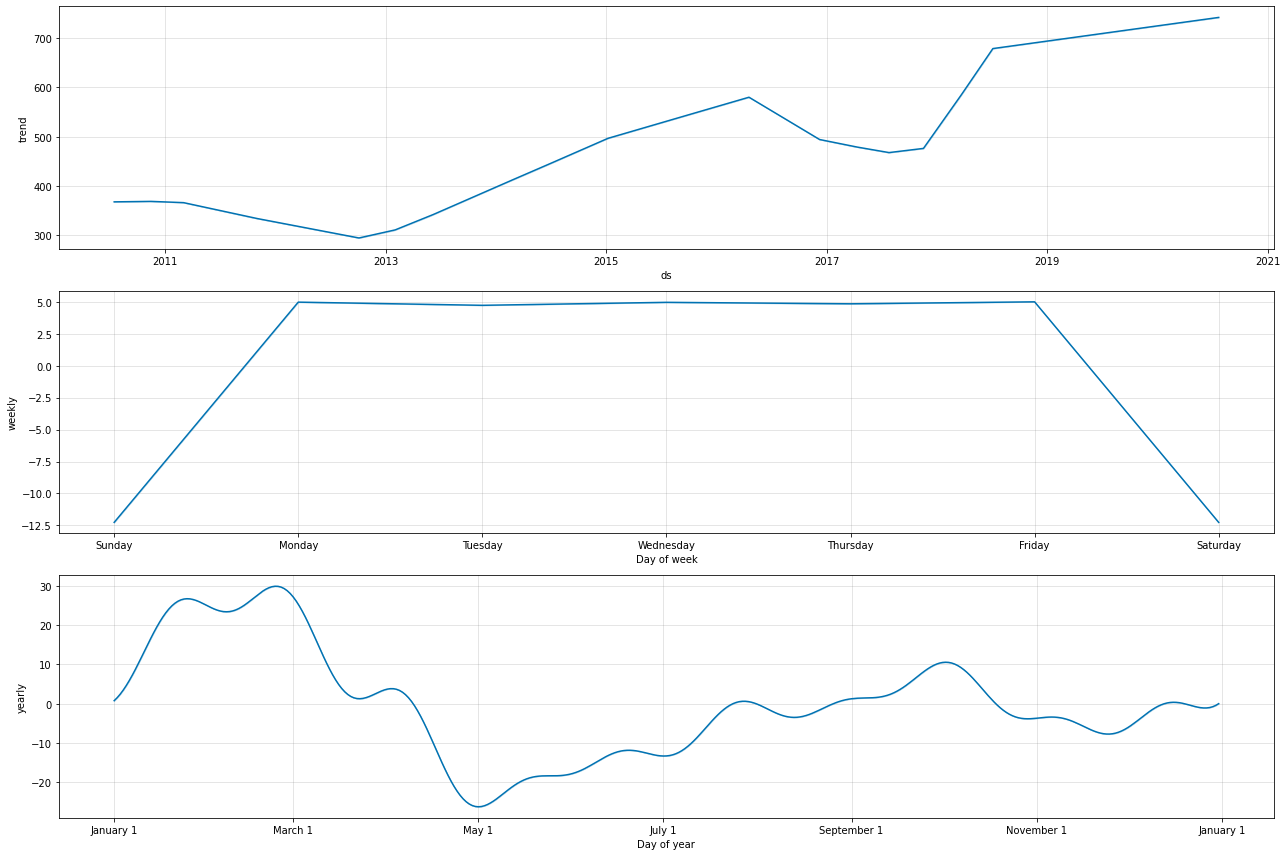

In [22]:
figure2 = m.plot_components(forecast, figsize=(18,12))

In [24]:
forc = forecast[['ds','yhat']]
forc = forc.rename(columns={'ds':'Date', 'yhat':'forecast_Close'})
forc.tail(12)

,Date,forecast_Close
2456,2020-07-09,734.735038
2457,2020-07-10,735.662314
2458,2020-07-13,738.283543
2459,2020-07-14,738.983632
2460,2020-07-15,740.176749
2461,2020-07-16,741.014690
2462,2020-07-17,742.103295
2463,2020-07-18,725.737423
2464,2020-07-19,726.587470
2465,2020-07-20,744.616793


**FINAL FORECAST**